In [1]:
install.packages("tidyverse")
library("tidyverse")
library("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [233]:
dataset <- read.csv("TitanicMess.tsv", header=T, sep="	", dec=",")
head(dataset)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ship
,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,"7,25",,S,Titanic
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,"71,2833",C85,C,Titanic
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,"7,925",,S,Titanic
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,"53,1",C123,S,Titanic
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,"8,05",,S,Titanic
6,6,0,3,"Moran, Mr. James",male,,0,0,330877,"8,4583",,Q,Titanic


Opłata (Fare) oraz wiek (Age) były podane z brakującymi wartościami przez co były traktowane jako zbiór znaków a nie wartość ciągła.

Klasa biletu podana była jako wartość ciągła a tak naprawdę przyjmowała jedną z 3ch wartości.

In [234]:
dataset <- transform(dataset, Fare = as.numeric(gsub(",",".",Fare)), Age = as.numeric(Age), Pclass = as.character(Pclass))
dataset

Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
“NAs introduced by coercion”
Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
“NAs introduced by coercion”


PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ship
<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S,Titanic
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,Titanic
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S,Titanic
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Titanic
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S,Titanic
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q,Titanic
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,Titanic
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S,Titanic
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S,Titanic


Zbiór zawiera 892 obserwacje opisanych 13ma atrybutami.

Niektóre z obserwacji powtarzają się (np. id=11), część danych jest niejasna oraz brakuje w nich części wartości.

Cześć atrybutów to atrybuty liczbowe a część opisowe z binarnym atrybutem decyzyjnym Survived określającym czy danej osobie udało się przeżyć katastrofę.

Warning message:
“Removed 198 rows containing missing values (position_stack).”
Warning message:
“position_stack requires non-overlapping x intervals”


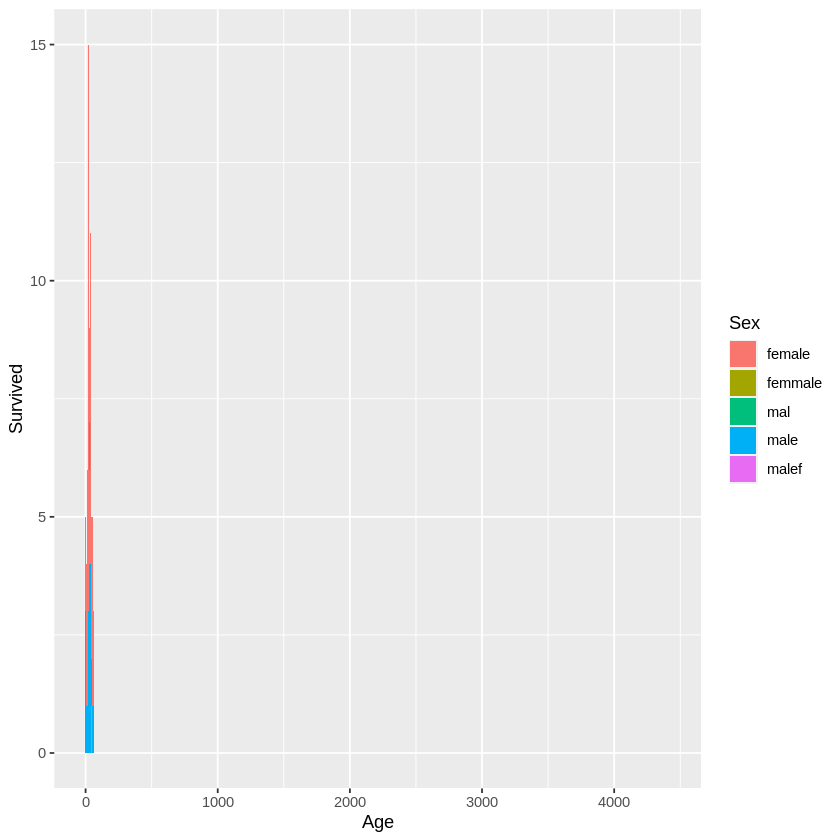

In [154]:
ggplot(dataset, aes(Age, Survived, fill=Sex)) + geom_bar(stat="identity", width=5)

Jak widać na wykresie zależności przeżycia od wieku i podsumowaniu wieku, występują niepoprawne skrajne wartości wieku powyżej 4000 lat.

Widać też, że atrybut płeć przyjmuje różne wartości dla kobiet (fem, female, femmale) i mężczyzn (mal, male, malef). 

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
-90.000   7.896  14.454  32.092  30.848 512.329       1 

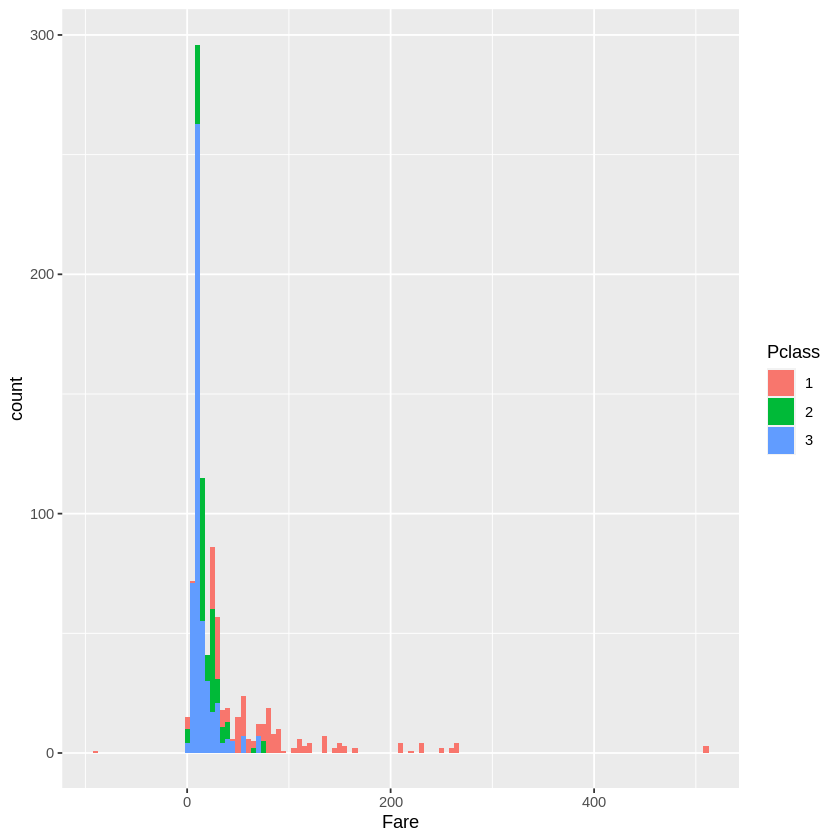

In [155]:
ggplot(dataset, aes(x=Fare, fill=Pclass)) + geom_histogram(binwidth = 5)
summary(dataset$Fare)

W przypadku opłat tylko jedna osoba nie ma jej uzupełnionej ale spotykamy się z błędnymi wartościami ujemnymi. 

Jest tutaj też wartość dodatnia odstająca mocno od reszty ale nie sposób stwierdzić czy dla danej osoby bilet nie kosztował właśnie tyle ponieważ był to bilet dla pierwszej klasy. Można założyć, że bilet nie kosztował więcej niż 400$

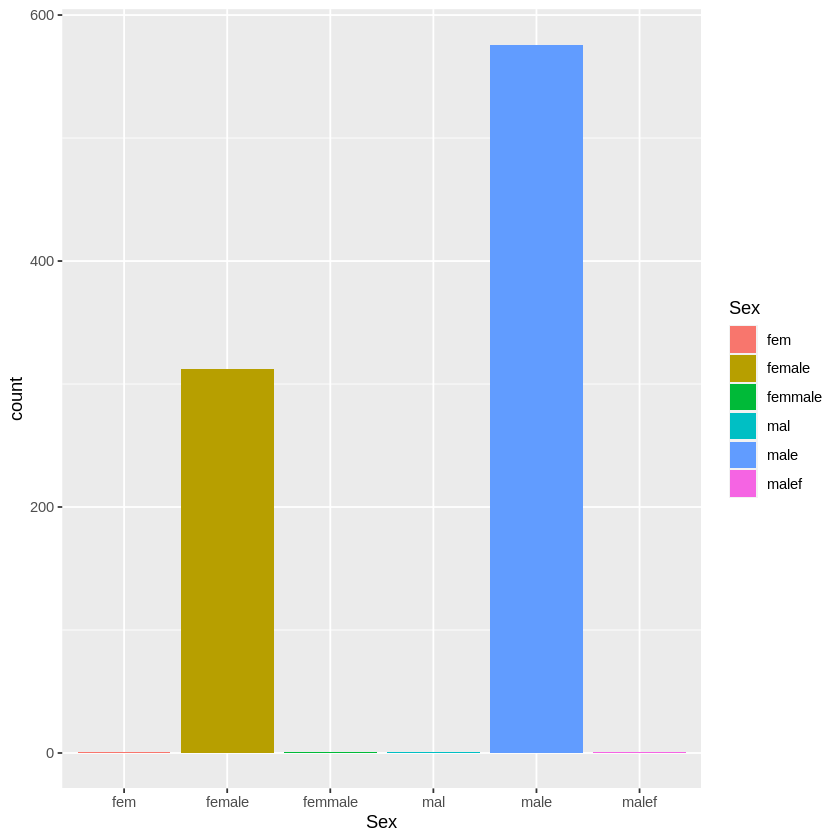

In [156]:
ggplot(dataset, aes(x=Sex, fill=Sex)) + geom_bar()

Rozkład wartości zmiennej Sex pokazuje, że prawidłowe są female i male a reszta to błędnie zapisane formy tychże.

Warning message:
“Removed 198 rows containing non-finite values (stat_bin).”


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  -12.0    20.0    28.0    36.3    38.0  4435.0     198 

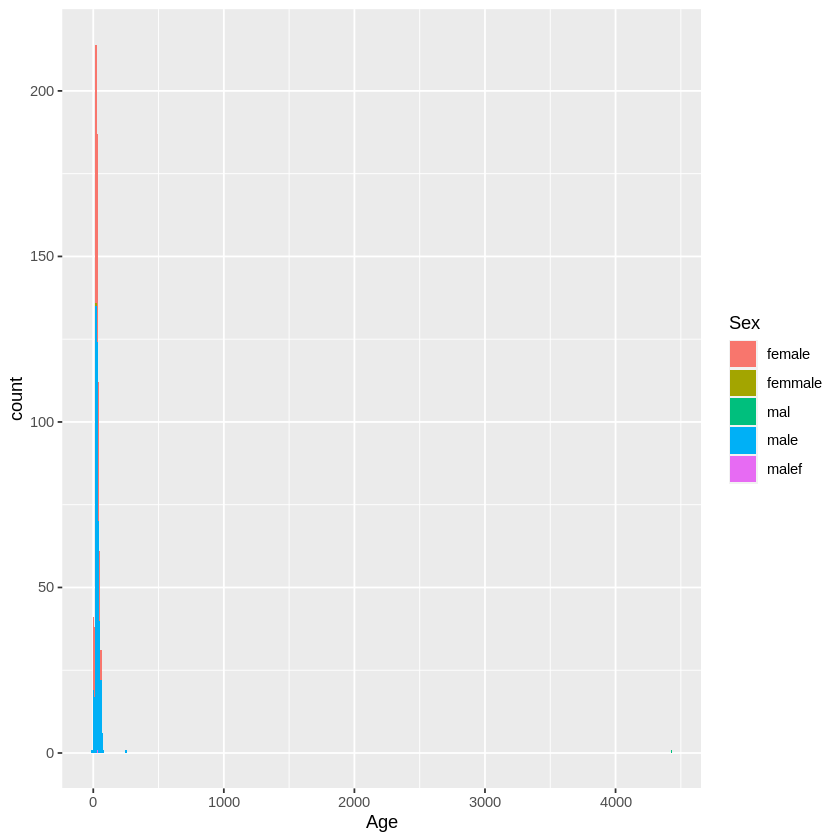

In [157]:
ggplot(dataset, aes(x=Age, fill=Sex)) + geom_histogram(binwidth=10)
summary(dataset$Age)

Na wykresie i podsumowaniu rozkładu wartości atrybutu wiek widać, że 198 osób nie ma uzupełnionego wieku. Występują niepoprawne wartości ujemne dla wieku (-12) jak i wartości błędne dodatnie (4435).

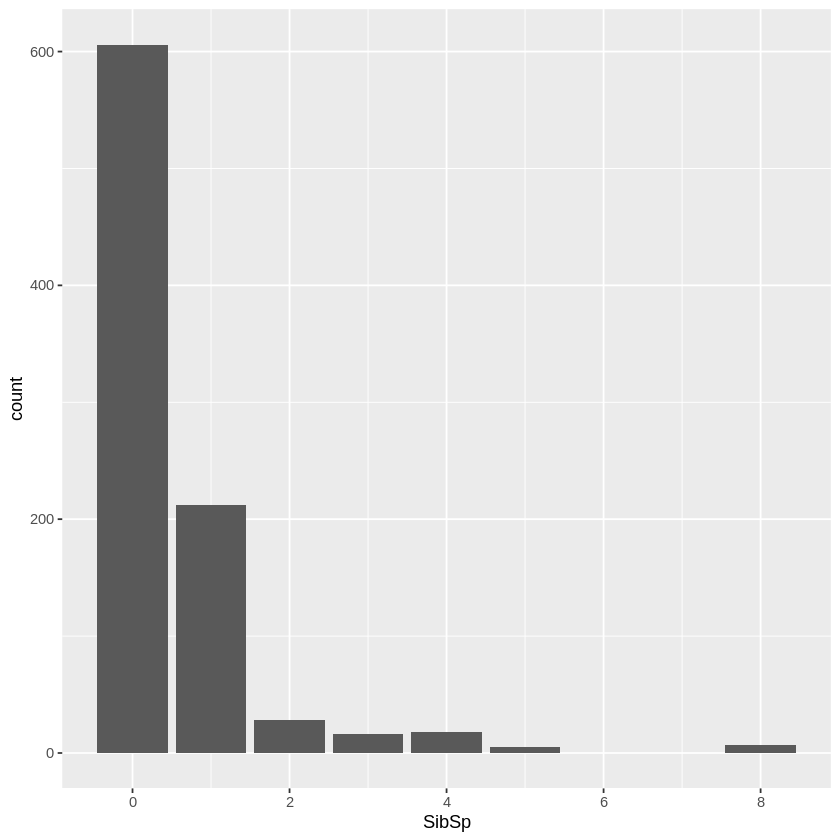

In [158]:
ggplot(dataset, aes(x=SibSp, fill=SibSp)) + geom_bar()

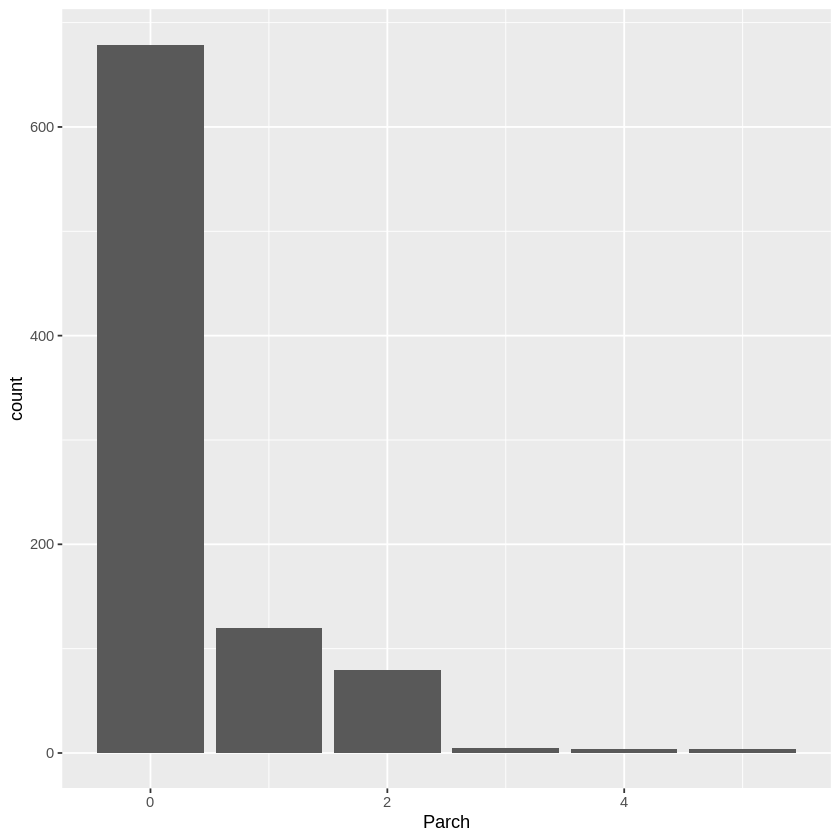

In [159]:
ggplot(dataset, aes(x=Parch, fill=Parch)) + geom_bar()

Wykresy ilości rodzeństwa/partnera i rodziców/dzieci przypadających na osobę pokazują, że wartości są wprowadzone poprawnie i nie występują anomalie widoczne gołym okiem.

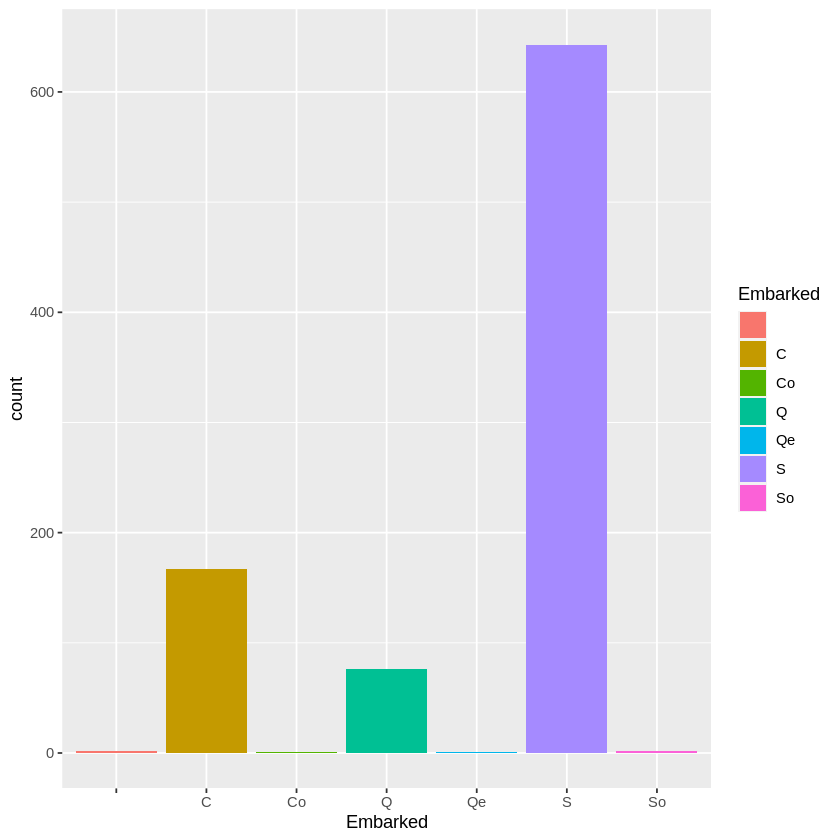

In [160]:
ggplot(dataset, aes(x=Embarked, fill=Embarked)) + geom_bar()

Atrybut Embarked (miejsce wypłynięcia) powinien przyjmować tylko 3 wartości C = Cherbourg, Q = Queenstown, S = Southampton. Na wykresie rozkładu wartości atrybutu widać, że nie które są brakujące a niektóre uzupełnione błędnie aczkolwiek można rozpoznać o którą poprawną wartość chodziło.

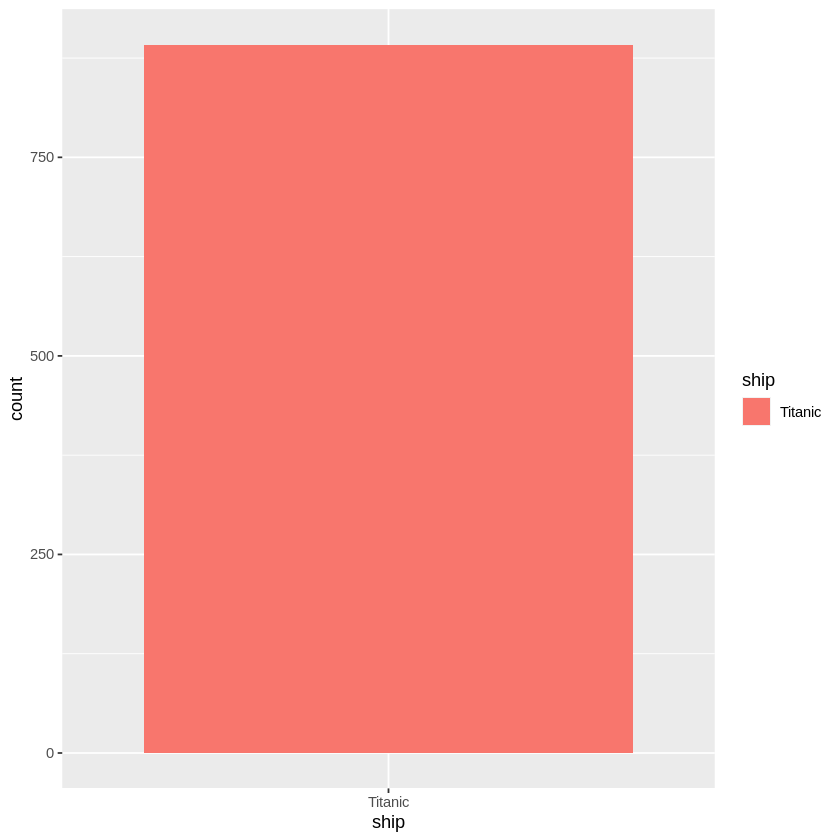

In [161]:
ggplot(dataset, aes(x=ship, fill=ship)) + geom_bar()

Numer kabiny i imię to atrybuty które nie wnoszą nic do analizy danych, pomagają jedynie rozpoznać pasażera po nazwisku oraz przydzielone mu miejsce.

Wszyscy płynęli jednym statkiem więc kolumna ship jest zbędna.

Najpierw usunięto powtarzające się wpisy według ich id oraz wpisy z brakującymi wartościami.

In [235]:
dataset = dataset[!duplicated(dataset$PassengerId),]
dataset = dataset[complete.cases(dataset),]
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ship
,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,,S,Titanic
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,Titanic
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,,S,Titanic
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Titanic
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,,S,Titanic
7,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Titanic
8,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,,S,Titanic
9,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,,S,Titanic
10,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,,C,Titanic


Jak widać liczba wierszy zmniejszyła się z 892 do 689.

Kolejnym krokiem jest ustandaryzowanie wartości płci a więc zamiana fem i femmale na female oraz mal i malef na male.

In [236]:
dataset <- transform(dataset, Sex = gsub("\\<femmale\\>","female",Sex))
dataset <- transform(dataset, Sex = gsub("\\<fem\\>","female",Sex))
dataset <- transform(dataset, Sex = gsub("\\<mal\\>","male",Sex))
dataset <- transform(dataset, Sex = gsub("\\<malef\\>","male",Sex))

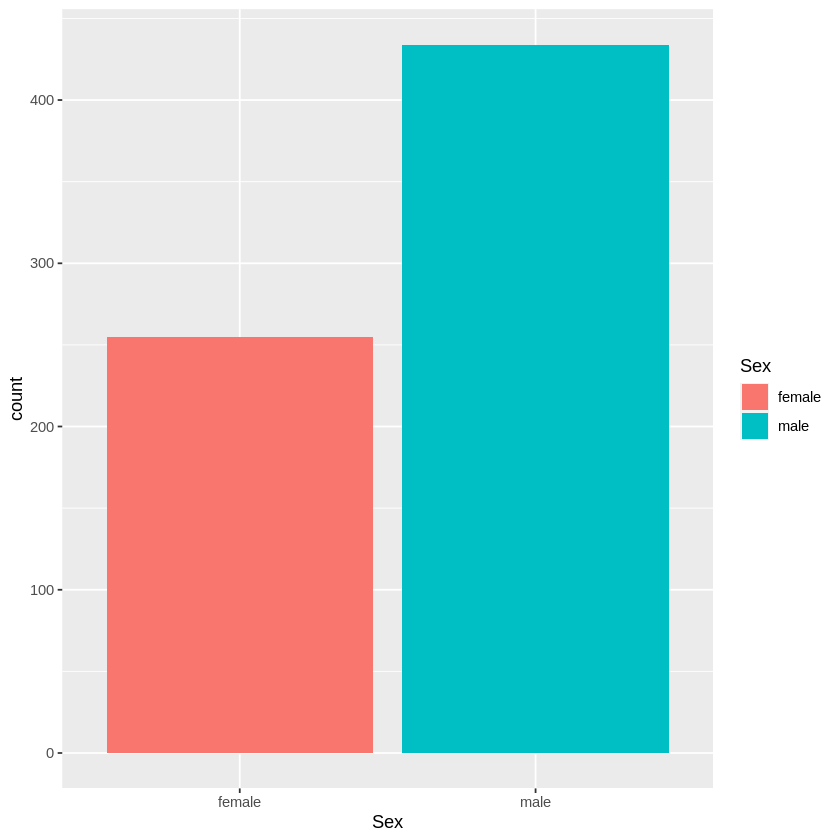

In [237]:
ggplot(dataset, aes(x=Sex, fill=Sex)) + geom_bar()

Widać teraz, że płcie zostały ograniczone do dwóch wartości.

Następnie usunięto ujemne oraz odstające wartości z atrybutu Fare.

In [238]:
dataset = dataset[!(dataset$Fare < 0),]
dataset = dataset[!(dataset$Fare > 400),]

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    8.05   15.74   33.16   34.02  263.00 

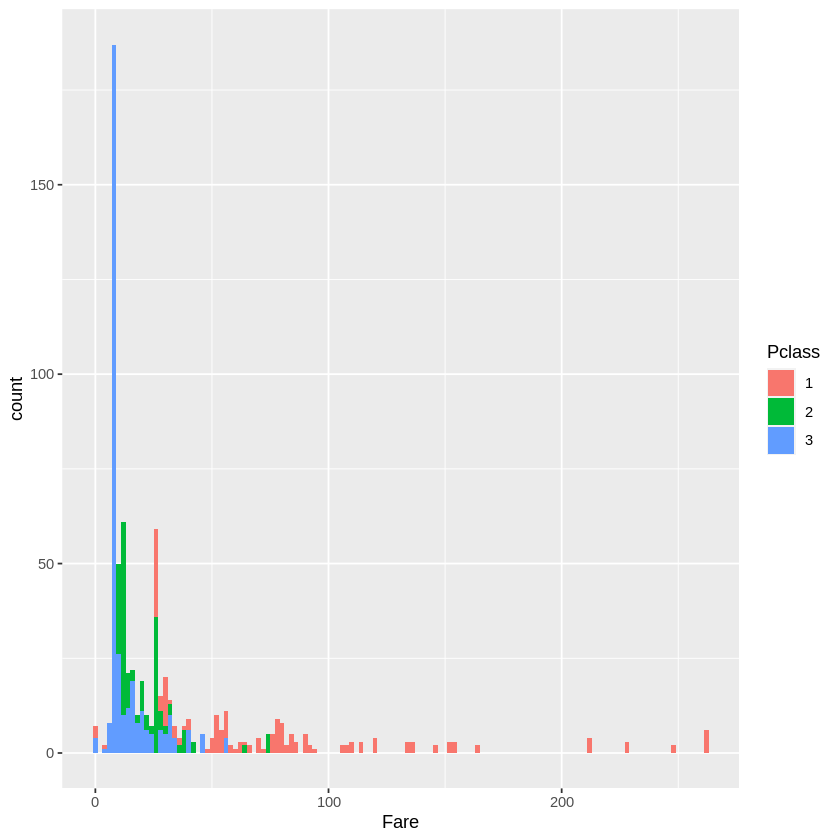

In [239]:
ggplot(dataset, aes(x=Fare, fill=Pclass)) + geom_histogram(binwidth = 2)
summary(dataset$Fare)

Następnym krokiem jest usunięcie nieprawidłowych wartości dla wieku. Można założyć, że pasażerowie byli w wieku od 0 do 100 lat.

In [240]:
dataset = dataset[!(dataset$Age < 0),]
dataset = dataset[!(dataset$Age > 100),]

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.90   20.00   28.00   29.78   38.00   80.00 

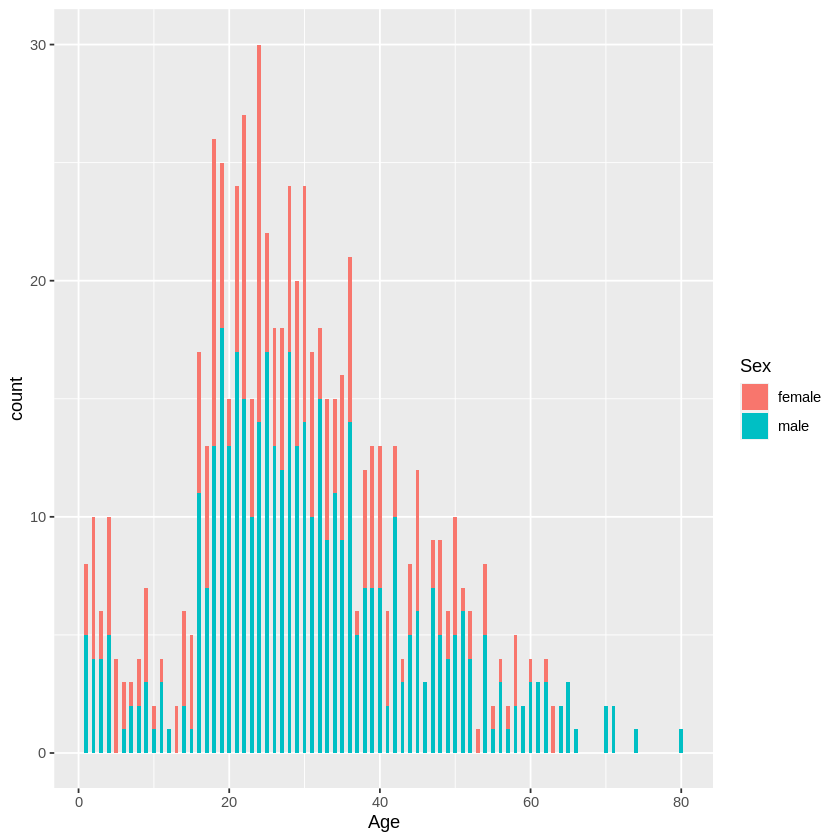

In [241]:
ggplot(dataset, aes(x=Age, fill=Sex)) + geom_histogram(binwidth=0.5)
summary(dataset$Age)

Widać, że wykres rozkładu wieku stał się dużo bardziej czytelny.

Kolejnym krokiem będzie ujednolicenie atrybutu Embarked. I usunięcie wszystkich wierszy z niepoprawnymi wartościami.

In [242]:
dataset <- transform(dataset, Embarked = gsub("\\<Co\\>","C",Embarked))
dataset <- transform(dataset, Embarked = gsub("\\<Qe\\>","Q",Embarked))
dataset <- transform(dataset, Embarked = gsub("\\<So\\>","S",Embarked))
dataset = dataset[(dataset$Embarked %in% c('S','C','Q')),]

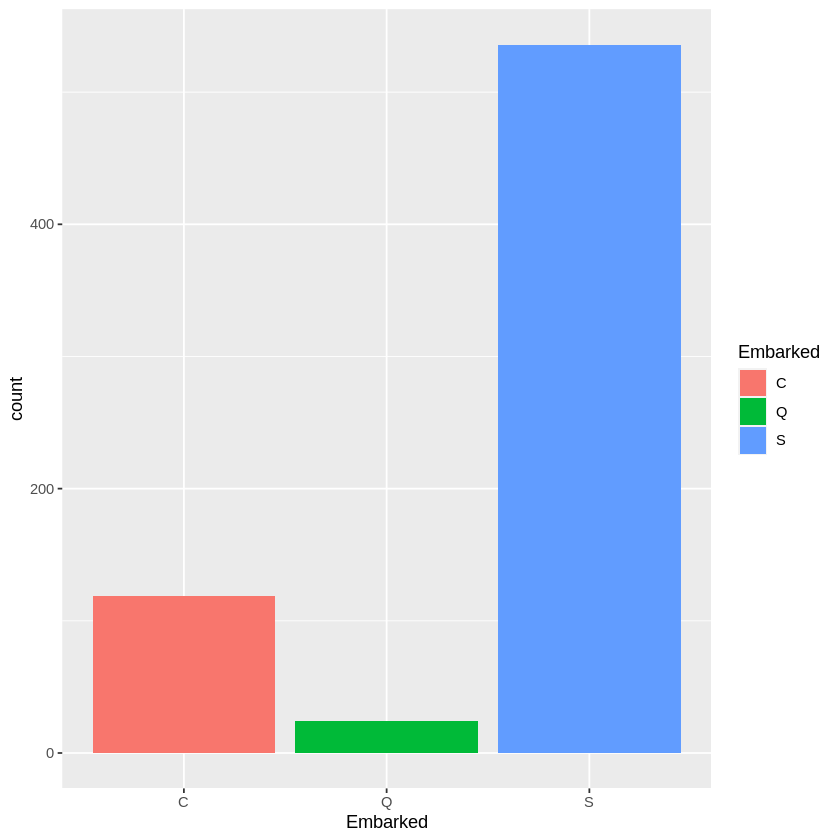

In [243]:
ggplot(dataset, aes(x=Embarked, fill=Embarked)) + geom_bar()

Ostatnim krokiem jest usunięcie zbędnej kolumny Ship.

In [244]:
dataset = dataset[,c(1:12)]
summary(dataset)
head(dataset)

  PassengerId        Survived         Pclass              Name          
 Min.   :   1.0   Min.   :0.0000   Length:679         Length:679        
 1st Qu.: 226.5   1st Qu.:0.0000   Class :character   Class :character  
 Median : 446.0   Median :0.0000   Mode  :character   Mode  :character  
 Mean   : 450.4   Mean   :0.4065                                        
 3rd Qu.: 675.0   3rd Qu.:1.0000                                        
 Max.   :1000.0   Max.   :1.0000                                        
     Sex                 Age            SibSp            Parch       
 Length:679         Min.   : 0.90   Min.   :0.0000   Min.   :0.0000  
 Class :character   1st Qu.:20.00   1st Qu.:0.0000   1st Qu.:0.0000  
 Mode  :character   Median :28.00   Median :0.0000   Median :0.0000  
                    Mean   :29.72   Mean   :0.5214   Mean   :0.4153  
                    3rd Qu.:38.00   3rd Qu.:1.0000   3rd Qu.:1.0000  
                    Max.   :80.00   Max.   :5.0000   Max.   :5.0000  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
7,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S


Trzeba jeszcze zapisać wyniki w pliku.

In [247]:
write.table(dataset, file = "TitanicCleaned.tsv", row.names=FALSE, dec=",", sep="\t")